In [1]:
import pandas as pd
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)

In [2]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y=mnist["data"],mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [6]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


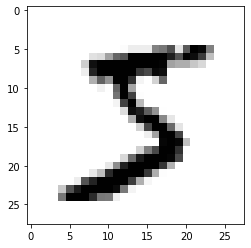

In [7]:
some_digit=np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("on")
plt.show()

In [27]:
y[0]

'5'

In [29]:
Y=[]
for i in range(len(y)):
    if(y[i]=='1' or y[i]=='0'):
        Y.append(y[i])
    else:
         Y.append('-1')


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/5, random_state = 47)

In [31]:
clf = SVC() 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [32]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
print('Accuracy Score on confusion_matrix: ' ,metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[11023    10    12]
 [   25  1361     0]
 [   22     0  1547]]
Accuracy Score on confusion_matrix:  0.9950714285714286
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     11045
           0       0.99      0.98      0.99      1386
           1       0.99      0.99      0.99      1569

    accuracy                           1.00     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       1.00      1.00      1.00     14000



In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
print('Accuracy Score on confusion_matrix: ' ,metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
print('Accuracy Score on confusion_matrix: ' ,metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
clf=SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
print('Accuracy Score on confusion_matrix: ' ,metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

In [ ]:
clf=SVC(kernel='poly', degree=8)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
print('Accuracy Score on confusion_matrix: ' ,metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))